In [1]:
import atd2022
import torch
import pandas as pd
import numpy as np
from atd_informer.atd_informer_V2 import ATD_Informer_V2
from utils.tools import dotdict
from atd_wrapper_V2 import InformerForcaster_V2
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
torch.cuda.set_device(1) 

# Testing ATD Protocol

In [4]:
truth = atd2022.io.read_csv()

In [5]:
args = dotdict()
args.enc_in = 5200 # encoder input size
args.dec_in = 5200 # decoder input size
args.c_out = 5200 # output size
args.factor = 6 # probsparse attn factor
args.d_model = 1500 # dimension of model
args.n_heads = 18 # num of heads
args.e_layers = 6 # num of encoder layers
args.d_layers = 6 # num of decoder layers
args.d_ff = 3000 # dimension of fcn in model
args.dropout = 0.005 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = True # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=1


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"



args.seq_len=52
args.label_len=4
args.pred_len=4


args.batch_size = 32
args.learning_rate = 0.001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=1
args.train_epochs=1
args.patience=5

In [6]:
exp = InformerForcaster_V2(args)

In [7]:
exp.fit(truth)

Use GPU: cuda:None
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl52_ll4_pl4_dm1500_nh18_el6_dl6_df3000_atprob_fc6_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 7.084685325622559
Epoch: 1, Steps: 4 | Train Loss: 4626868.5000000
Validation loss decreased (inf --> 4626868.500000).  Saving model ...


In [8]:
test=exp.predict([1,2,3,4])

[[4.1408873 3.9604838 3.1525304 ... 3.5255544 3.0886736 2.363277 ]
 [4.1411686 3.9629896 3.1563063 ... 3.5327258 3.085878  2.3624525]
 [4.1345806 3.961229  3.154509  ... 3.5257068 3.0736692 2.3621225]
 [4.1492567 3.9669366 3.1503239 ... 3.5262194 3.0872438 2.369316 ]]
<class 'numpy.ndarray'>
(4, 5200)


In [9]:
test

Region                  AA                                                    \
Event                   01   02   03   04   05   06   07   08   09   10   11   
2018-02-12/2018-02-18  4.0  4.0  3.0  4.0  4.0  3.0  3.0  3.0  3.0  1.0  3.0   
2018-02-19/2018-02-25  4.0  4.0  3.0  4.0  4.0  3.0  3.0  3.0  3.0  1.0  3.0   
2018-02-26/2018-03-04  4.0  4.0  3.0  4.0  4.0  3.0  3.0  3.0  3.0  1.0  3.0   
2018-03-05/2018-03-11  4.0  4.0  3.0  4.0  4.0  3.0  3.0  3.0  3.0  1.0  3.0   

Region                                                               AC       \
Event                   12   13   14   15   16   17   18   19   20   01   02   
2018-02-12/2018-02-18  3.0  1.0  0.0  0.0  2.0  4.0  2.0  3.0  1.0  3.0  5.0   
2018-02-19/2018-02-25  3.0  1.0  0.0  0.0  2.0  4.0  2.0  3.0  1.0  3.0  5.0   
2018-02-26/2018-03-04  3.0  1.0  0.0  0.0  2.0  4.0  2.0  3.0  1.0  3.0  5.0   
2018-03-05/2018-03-11  3.0  1.0  0.0  0.0  2.0  4.0  2.0  3.0  1.0  3.0  5.0   

Region                                                                        \
Event                   03   04   05   06   07   08   09   10   11   12   13   
2018-02-12/2018-02-18  3.0  3.0  4.0  4.0  4.0  3.0  3.0  3.0  3.0  4.0  3.0   
2018-02-19/2018-02-25  3.0  3.0  4.0  4.0  4.0  3.0  3.0  3.0  3.0  4.0  3.0   
2018-02-26/2018-03-04  3.0  3.0  4.0  4.0  4.0  3.0  3.0  3.0  3.0  4.0  3.0   
2018-03-05/2018-03-11  3.0  3.0  4.0  4.0  4.0  3.0  3.0  3.0  3.0  4.0  3.0   

Region                                                     AE                 \
Event                   14   15   16   17   18   19   20   01   02   03   04   
2018-02-12/2018-02-18  1.0  0.0  2.0  4.0  1.0  4.0  1.0  3.0  4.0  5.0  5.0   
2018-02-19/2018-02-25  1.0  0.0  2.0  4.0  1.0  4.0  1.0  3.0  4.0  5.0  5.0   
2018-02-26/2018-03-04  1.0  0.0  2.0  4.0  1.0  4.0  1.0  3.0  4.0  5.0  5.0   
2018-03-05/2018-03-11  1.0  0.0  2.0  4.0  1.0  4.0  1.0  3.0  4.0  5.0  5.0   

Region                                                                        \
Event                   05   06   07   08   09   10   11   12   13   14   15   
2018-02-12/2018-02-18  3.0  5.0  3.0  4.0  3.0  5.0  4.0  4.0  3.0  4.0  4.0   
2018-02-19/2018-02-25  3.0  5.0  3.0  4.0  3.0  5.0  4.0  4.0  3.0  4.0  4.0   
2018-02-26/2018-03-04  3.0  5.0  3.0  4.0  3.0  5.0  4.0  4.0  3.0  4.0  4.0   
2018-03-05/2018-03-11  3.0  5.0  3.0  4.0  3.0  5.0  4.0  4.0  3.0  4.0  4.0   

Region                                           AF                           \
Event                   16   17   18   19   20   01   02   03   04   05   06   
2018-02-12/2018-02-18  3.0  5.0  4.0  4.0  1.0  4.0  3.0  4.0  4.0  4.0  3.0   
2018-02-19/2018-02-25  3.0  5.0  4.0  4.0  1.0  4.0  3.0  4.0  4.0  4.0  3.0   
2018-02-26/2018-03-04  3.0  5.0  4.0  4.0  1.0  4.0  3.0  4.0  4.0  4.0  3.0   
2018-03-05/2018-03-11  3.0  5.0  4.0  4.0  1.0  4.0  3.0  4.0  4.0  4.0  3.0   

Region                                                                        \
Event                   07   08   09   10   11   12   13   14   15   16   17   
2018-02-12/2018-02-18  5.0  4.0  4.0  3.0  4.0  3.0  4.0  4.0  3.0  4.0  3.0   
2018-02-19/2018-02-25  5.0  4.0  4.0  3.0  4.0  3.0  4.0  4.0  3.0  4.0  3.0   
2018-02-26/2018-03-04  5.0  4.0  4.0  3.0  4.0  3.0  4.0  4.0  3.0  4.0  3.0   
2018-03-05/2018-03-11  5.0  4.0  4.0  3.0  4.0  3.0  4.0  4.0  3.0  4.0  3.0   

Region                                 AG                                     \
Event                   18   19   20   01   02   03   04   05   06   07   08   
2018-02-12/2018-02-18  4.0  4.0  4.0  3.0  4.0  3.0  4.0  5.0  4.0  3.0  4.0   
2018-02-19/2018-02-25  4.0  4.0  4.0  3.0  4.0  3.0  4.0  5.0  4.0  3.0  4.0   
2018-02-26/2018-03-04  4.0  4.0  4.0  3.0  4.0  3.0  4.0  5.0  4.0  3.0  4.0   
2018-03-05/2018-03-11  4.0  4.0  4.0  3.0  4.0  3.0  4.0  5.0  3.0  3.0  4.0   

Region                                                                        \
Event                   09   10   11   12   13   14   15   16   17   18 

# Full Scaled Testing

In [4]:
args = dotdict()
args.enc_in = 5200 # encoder input size
args.dec_in = 5200 # decoder input size
args.c_out = 5200 # output size
args.factor = 6 # probsparse attn factor
args.d_model = 1500 # dimension of model
args.n_heads = 18 # num of heads
args.e_layers = 6 # num of encoder layers
args.d_layers = 6 # num of decoder layers
args.d_ff = 3000 # dimension of fcn in model
args.dropout = 0.005 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = True # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=1


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"



args.seq_len=52
args.label_len=4
args.pred_len=4


args.batch_size = 40
args.learning_rate = 0.001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=1
args.train_epochs=100
args.patience=5

In [5]:
lispDL = InformerForcaster_V2(args)

In [6]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [7]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispDL,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<atd_wrapper_V2.InformerForcaster_V2 object at 0x7fd28849a430>:   0%|          | 0/5 [00:00<?, ?it/s]

Use GPU: cuda:None
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl52_ll4_pl4_dm1500_nh18_el6_dl6_df3000_atprob_fc6_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0003476142883300781
Epoch: 1, Steps: 0 | Train Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.0003390312194824219
Epoch: 2, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 3 cost time: 0.0003714561462402344
Epoch: 3, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 4 cost time: 0.0006208419799804688
Epoch: 4, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 5 cost time: 0.0005595684051513672
Epoch: 5, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 6 cost time: 0.0003771781921386719
Epoch: 6, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Savi

Epoch: 58 cost time: 0.0005009174346923828
Epoch: 58, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 59 cost time: 0.0003800392150878906
Epoch: 59, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 60 cost time: 0.00032329559326171875
Epoch: 60, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 61 cost time: 0.0003445148468017578
Epoch: 61, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 62 cost time: 0.0003790855407714844
Epoch: 62, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 63 cost time: 0.0003590583801269531
Epoch: 63, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 64 cost time: 0.00037789344787597656
Epoch: 64, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 65 cost tim

Epoch: 13 cost time: 0.0002338886260986328
Epoch: 13, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 14 cost time: 0.000232696533203125
Epoch: 14, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 15 cost time: 0.0003390312194824219
Epoch: 15, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 16 cost time: 0.0003573894500732422
Epoch: 16, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 17 cost time: 0.0002739429473876953
Epoch: 17, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 18 cost time: 0.0004115104675292969
Epoch: 18, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 19 cost time: 0.0002701282501220703
Epoch: 19, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 20 cost time: 

Epoch: 72 cost time: 0.0003383159637451172
Epoch: 72, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 73 cost time: 0.0003705024719238281
Epoch: 73, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 74 cost time: 0.0001728534698486328
Epoch: 74, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 75 cost time: 0.00032401084899902344
Epoch: 75, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 76 cost time: 0.0003349781036376953
Epoch: 76, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 77 cost time: 0.0003199577331542969
Epoch: 77, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 78 cost time: 0.00033283233642578125
Epoch: 78, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 79 cost tim

Epoch: 27 cost time: 0.00040841102600097656
Epoch: 27, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 28 cost time: 0.0005726814270019531
Epoch: 28, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 29 cost time: 0.0007481575012207031
Epoch: 29, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 30 cost time: 0.0005211830139160156
Epoch: 30, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 31 cost time: 0.0009801387786865234
Epoch: 31, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 32 cost time: 0.0021598339080810547
Epoch: 32, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 33 cost time: 0.0003592967987060547
Epoch: 33, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 34 cost time

Epoch: 86 cost time: 0.0002567768096923828
Epoch: 86, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 87 cost time: 0.00026106834411621094
Epoch: 87, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 88 cost time: 0.0005080699920654297
Epoch: 88, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 89 cost time: 0.0002474784851074219
Epoch: 89, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 90 cost time: 0.00023818016052246094
Epoch: 90, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 91 cost time: 0.0003273487091064453
Epoch: 91, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 92 cost time: 0.0002357959747314453
Epoch: 92, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 93 cost tim

Updating learning rate to 0.00098
Epoch: 41 cost time: 0.0006911754608154297
Epoch: 41, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 42 cost time: 0.00024390220642089844
Epoch: 42, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 43 cost time: 0.0002808570861816406
Epoch: 43, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 44 cost time: 0.00024127960205078125
Epoch: 44, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 45 cost time: 0.0002129077911376953
Epoch: 45, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 46 cost time: 0.00024056434631347656
Epoch: 46, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 47 cost time: 0.0010237693786621094
Epoch: 47, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  

Epoch: 99 cost time: 0.00035119056701660156
Epoch: 99, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 100 cost time: 0.00038051605224609375
Epoch: 100, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
[[ 0.41089758  0.9457526   0.11262026 ... -0.16812347 -0.651392
   0.2299025 ]
 [ 0.17080355 -0.3796145   0.32310444 ... -0.3761549  -1.0152938
  -0.8865752 ]
 [ 0.21340278  0.18111362  0.02605224 ... -0.15218592  0.06064297
  -0.98257315]
 [ 0.63115686  0.26798007 -0.6681073  ... -0.597001   -0.31919104
  -0.7627982 ]]
<class 'numpy.ndarray'>
(4, 5200)
Use GPU: cuda:None
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl52_ll4_pl4_dm1500_nh18_el6_dl6_df3000_atprob_fc6_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.0001697540283203125
Epoch: 1, Steps: 0 | Train Loss: nan
Validation loss decreased (inf --> nan).  Saving model ...
Epoch: 2 cost time: 0.000249385833740

Epoch: 74 cost time: 0.0002486705780029297
Epoch: 74, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 75 cost time: 0.00034332275390625
Epoch: 75, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 76 cost time: 0.00040912628173828125
Epoch: 76, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 77 cost time: 0.00024366378784179688
Epoch: 77, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 78 cost time: 0.0002639293670654297
Epoch: 78, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 79 cost time: 0.0002472400665283203
Epoch: 79, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Epoch: 80 cost time: 0.0003600120544433594
Epoch: 80, Steps: 0 | Train Loss: nan
Validation loss decreased (nan --> nan).  Saving model ...
Updating learning ra

PredictMeanForecaster():   0%|          | 0/5 [00:00<?, ?it/s]

ExponentiallyWeightedMovingAverage(span=3):   0%|          | 0/5 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<atd_wrapper_V2.InformerForcaster_V2 object at 0x7fd28849a430>,5.548942,240.123414
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                              n                            
<atd_wrapper_V2.InformerForcaster_V2 object at ... 0                 5.569459   
                                                   1                 5.510254   
                                                   2                 5.512251   
                                                   3                 5.603805   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<atd_wrapper_V2.InformerForcaster_V2 object at ... 0        238.182203  
                                                   1        237.315423  
                                                   2        237.500263  
                                                   3        241.498625  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

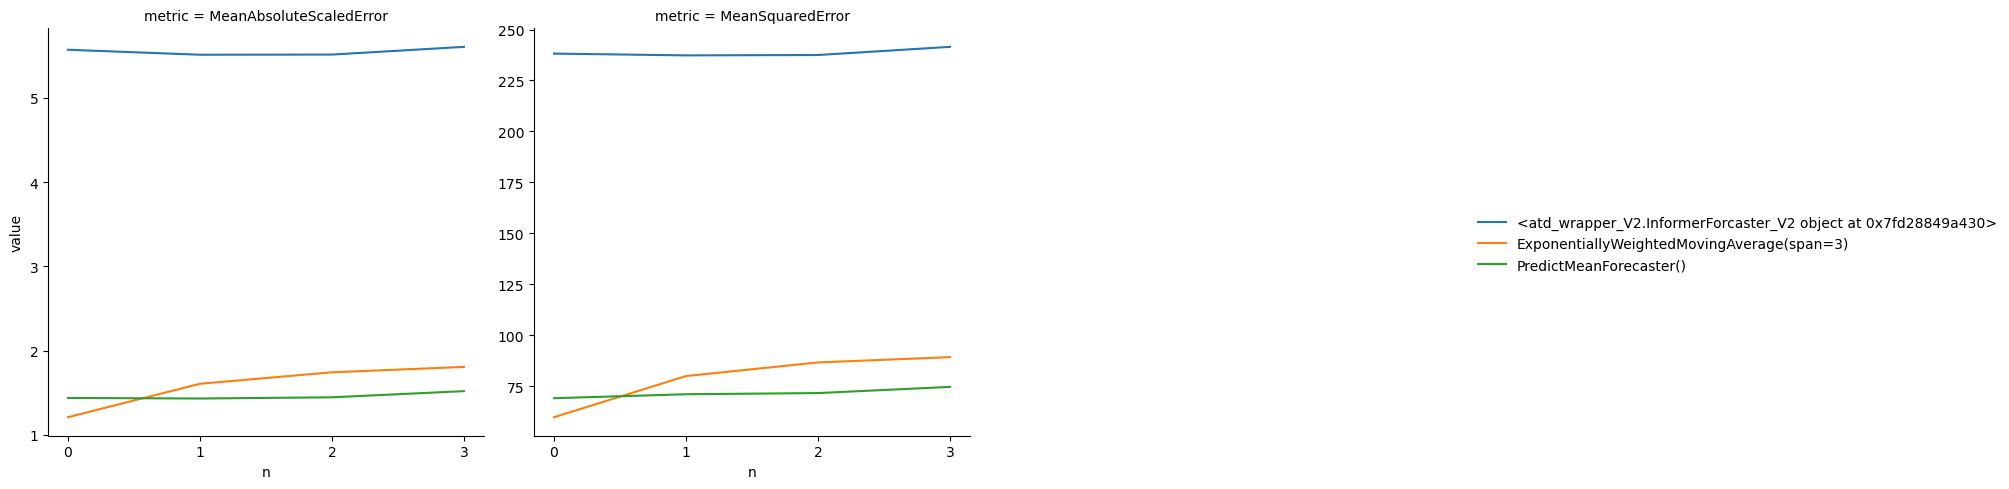

In [9]:
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))